# 행렬 인수분해
행렬 인수분해(Matrix Factorization)란 하나의 행렬을 여러 개의 행렬의 곱으로 나타내는 것을 말합니다. 마치 우리가 정수를 소인수분해하듯이, 행렬을 더 다루기 쉽거나 의미 있는 형태의 행렬들로 분해하는 것이죠.

In [1]:
import numpy as np

A = np.array([[4,1,5,4,1],
              [2,3,5,2,3],
              [1,3,4,1,3],
              [2,2,4,2,2],
              [1,3,4,1,3]])
A

array([[4, 1, 5, 4, 1],
       [2, 3, 5, 2, 3],
       [1, 3, 4, 1, 3],
       [2, 2, 4, 2, 2],
       [1, 3, 4, 1, 3]])

In [2]:
array1 = np.array([[4,1],
                   [2,3],
                   [1,3],
                   [2,2],
                   [1,3]])

array2 = np.array([[1,0,1,1,0],
                   [0,1,1,0,1]])

array1 @ array2

array([[4, 1, 5, 4, 1],
       [2, 3, 5, 2, 3],
       [1, 3, 4, 1, 3],
       [2, 2, 4, 2, 2],
       [1, 3, 4, 1, 3]])

In [3]:
A = np.array([[4,1,5,np.nan,1],
              [2,3,np.nan,2,3],
              [1,np.nan,4,1,3],
              [np.nan,2,4,np.nan,2],
              [1,np.nan,4,1,3]])
A

array([[ 4.,  1.,  5., nan,  1.],
       [ 2.,  3., nan,  2.,  3.],
       [ 1., nan,  4.,  1.,  3.],
       [nan,  2.,  4., nan,  2.],
       [ 1., nan,  4.,  1.,  3.]])

In [6]:
mask = ~np.isnan(A)
mask

array([[ True,  True,  True, False,  True],
       [ True,  True, False,  True,  True],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False,  True],
       [ True, False,  True,  True,  True]])

In [16]:
k = 2
m,n = A.shape
lr = 0.01

U = np.random.rand(m,k)
V = np.random.rand(n,k)

pred = U @ V.T
pred

array([[0.01100373, 0.90110526, 0.05793986, 0.38961632, 0.26915938],
       [0.48604178, 1.09334505, 0.54602273, 0.85613715, 0.84660426],
       [0.42375477, 1.06003137, 0.48160364, 0.79154186, 0.76857697],
       [0.17932811, 0.78413664, 0.22126036, 0.47672892, 0.42097173],
       [0.27972787, 0.21899133, 0.2929114 , 0.31940581, 0.37020875]])

In [17]:
E = np.zeros((m,n))
E[mask] = pred[mask] - A[mask]
E

array([[-3.98899627, -0.09889474, -4.94206014,  0.        , -0.73084062],
       [-1.51395822, -1.90665495,  0.        , -1.14386285, -2.15339574],
       [-0.57624523,  0.        , -3.51839636, -0.20845814, -2.23142303],
       [ 0.        , -1.21586336, -3.77873964,  0.        , -1.57902827],
       [-0.72027213,  0.        , -3.7070886 , -0.68059419, -2.62979125]])

In [19]:
k = 10
m,n = A.shape
lr = 0.01

U = np.random.rand(m,k)
V = np.random.rand(n,k)

E = np.zeros((m,n))
E[mask] = pred[mask] - A[mask]

box = []
for i in range(5000):
    A_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = A_pred[mask] - A[mask]

    U_grad = E @ V
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

97.65968844210138
90.49134521309558
82.98242622004372
75.2757857524169
67.54530158607551
59.98258986737928
52.778793277062746
46.104363785151904
40.09091070208787
34.81910524111995
30.315136002797203
26.555808076188306
23.48007047911307
21.003463926924532
19.032041475295514
17.4733948730225
16.243840869003062
15.27199082505194
14.499573128118765
13.880534131545303
13.37929331858527
12.96876215573173
12.628479436893056
12.34302377676998
12.100743584591989
11.892781641342884
11.71234575688054
11.554172483013675
11.414136337369284
11.288965903832867
11.17603719270409
11.073222379402932
10.978778133727916
10.891262311725356
10.809471085572056
10.73239093041215
10.65916152870099
10.589046795031066
10.521412018163378
10.455705669850769
10.391444817410852
10.328203350815569
10.265602430748544
10.203302705707427
10.1409979501265
10.078409852773266
10.015283742928746
9.951385086331905
9.886496617202711
9.820415999428432
9.752953931042303
9.683932622775767
9.613184594705148
9.54055174557138
9.46

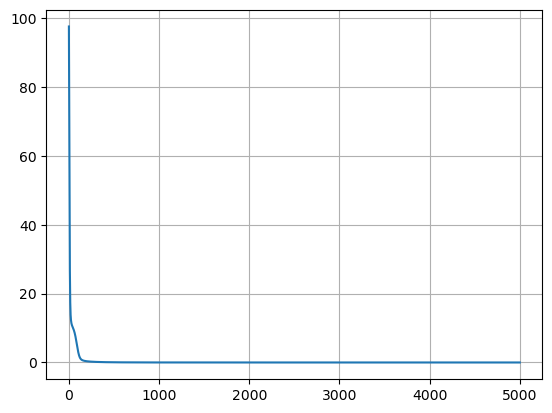

In [20]:
import matplotlib.pyplot as plt
plt.plot(box)
plt.grid()
plt.show()

In [21]:
A_pred

array([[3.99998686, 0.99999917, 5.00000465, 3.99935349, 0.9999988 ],
       [2.00006141, 2.99999906, 5.00009387, 1.99994305, 2.99999982],
       [0.99997029, 2.99999864, 4.00000009, 1.00003013, 2.99999958],
       [1.99997071, 2.00000208, 3.99999656, 1.99977303, 2.00000246],
       [0.99997029, 2.99999864, 4.00000009, 1.00003013, 2.99999958]])

In [29]:
A_filled = A.copy()
A_filled[~mask] = A_pred[~mask]

zeros = np.zeros(A_pred.shape)
zeros[~mask] += A_pred[~mask]

for i in range(len(zeros)):
    row = zeros[i]
    for j in range(len(row)):
        if row[j] >= 4:
            print(f"{i}번째 유저에게 {j}번째 영화 추천")

1번째 유저에게 2번째 영화 추천


In [ ]:
# 1. ratings

## 행렬 인수분해 추천 시스템 구현하기

In [16]:
import pandas as pd

df = pd.read_csv("ratings.csv")
df2 = df.pivot_table(index = 'userId', columns = 'movieId', values = 'rating').values
df2

array([[4. , nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [2.5, 2. , 2. , ..., nan, nan, nan],
       [3. , nan, nan, ..., nan, nan, nan],
       [5. , nan, nan, ..., nan, nan, nan]])

## 연습문제
1. k 값을 현재 설정된 값(예: 2)에서 k=5, k=20, k=50으로 변경해가며 모델을 학습시켜 보세요. (학습률 lr은 0.0005, 반복 횟수는 1000~2000회 정도로 조정하여 실행 시간을 관리하세요.) 각 k 값에 따른 최종 손실(loss) 값을 비교하고, k 값이 너무 작거나 너무 클 때 발생할 수 있는 문제점에 대해 생각해보세요. (예: 과소적합, 과적합) k 값의 변화가 특정 사용자(예: userId 1)에 대한 예측 평점(df_pred[0])에 어떤 영향을 미치는지 관찰해보세요.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("ratings.csv")
df2 = df.pivot_table(index = 'userId', columns = 'movieId', values = 'rating').values

mask = ~np.isnan(df2)

k = 50
m,n = df2.shape
lr = 0.0005

U = np.random.randn(m, k)
V = np.random.randn(n, k)

box = []

for i in range(2000):
    pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = pred[mask] - df2[mask]
    
    U_grad = E @ V
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    box.append(loss)

    if i % 100 == 0:
        print(i, loss)

0 1828953.4122042747
100 161940.1682848208
200 90623.02783026198
300 71498.64571683483
400 63871.630797759535
500 60272.86604151871
600 58315.136610934416
700 57075.48053550705
800 56170.27893209263
900 55432.48406139987
1000 54786.24243893021
1100 54195.768031905085
1200 53643.32423988927
1300 53119.49181479492
1400 52618.85960552764
1500 52138.08378221885
1600 51674.975108664476
1700 51228.05009217507
1800 50796.30372770957
1900 50379.08567553376


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df2[mask], pred[mask])
rmse = mean_squared_error(df2[mask], pred[mask]) ** (1/2)

mae, rmse

(0.5324424443647694, 0.7040284870961371)

2. 잠재 요인 수 k를 적절한 값(예: 10)으로 고정한 후, 학습률 lr을 0.01, 0.001, 0.00001 등으로 변경하며 모델을 학습시켜 보세요. 학습률 변화에 따른 반복 횟수별 손실(loss) 값의 변화를 관찰하세요. (Matplotlib 등을 사용하여 그래프로 시각화해보면 좋습니다.) 학습률이 너무 클 때와 너무 작을 때 어떤 현상이 발생하는지, 그 이유는 무엇일지 설명해보세요. (예: 발산, 학습 속도 저하)

3. 임의의 userId (예: 사용자 ID 5)를 선택하세요. 해당 사용자가 아직 평가하지 않은 영화들에 대한 예측 평점을 추출하세요. 추출된 예측 평점을 기준으로, 해당 사용자에게 가장 높은 평점이 예측된 상위 3개의 영화 제목을 추천하는 코드를 작성해보세요.

In [14]:
df = pd.read_csv("ratings.csv")
df2 = df.pivot_table(index = 'userId', columns = 'movieId', values = 'rating')
df2

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
idx = np.argsort(pred[4])[::-1][:5]
idx = df2.columns[idx]

movies = pd.read_csv("movies.csv")
movies[movies['movieId'].isin(idx)]

,movieId,title,genres
3031,4055,Panic (2000),Drama
4045,5746,Galaxy of Terror (Quest) (1981),Action|Horror|Mystery|Sci-Fi
4595,6835,Alien Contamination (1980),Action|Horror|Sci-Fi
7400,79897,Get Low (2009),Comedy|Drama|Mystery
8709,124851,Delirium (2014),Adventure|Romance|Sci-Fi
